In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



In [4]:
cw = pd.read_csv('cw_full.csv').drop('Unnamed: 0', axis=1)
print(cw.shape)
cw.head()

(128101, 8)


,title,clue,date,year,answer,unique,day,answer_count
0,,"___ Nast, publisher of Vogue",December 16,2016,CONDE,False,Friday,3
1,,Baby,December 16,2016,SPOIL,False,Friday,4
2,,Voodoo doll action,December 16,2016,HEX,False,Friday,6
3,,"""Robin ___"" (old Irish ballad)",December 16,2016,ADAIR,False,Friday,4
4,,Bittersweet spread,December 16,2016,MARMALADE,False,Friday,1


In [11]:

#convert to date format 
def monthToNum(mon):
    return{
        'January' : 1,
        'February' : 2,
        'March' : 3,
        'April' : 4,
        'May' : 5,
        'June' : 6,
        'July' : 7,
        'August' : 8,
        'September' : 9, 
        'October' : 10,
        'November' : 11,
        'December' : 12
    }[mon]

def cw_date(x):
    space, mon, day = re.split(' ', x['date'].rstrip())
    return datetime.date(int(x['year']), monthToNum(mon), 1)

cw['cw_date']=cw.apply(cw_date, axis=1)

In [13]:
HBO = cw[(cw['answer']=='HBO')].sort_values(['cw_date']).reset_index(drop=True)

HBO['show'] = ["Boardwalk Empire", "Boardwalk Empire", "True Blood", "The Newsroom", "Veep", "Game of Thrones", "Game of Thrones", 
               "Girls", "Veep", "Game of Thrones", "Girls", np.nan, "Game of Thrones", "Game of Thrones", "True Detective"]
HBO

,title,clue,date,year,answer,unique,day,answer_count,cw_date,show
0,,"""Boardwalk Empire"" airer",September 5,2012,HBO,False,Wednesday,15,2012-09-01,Boardwalk Empire
1,ARTFUL THINKING,"""Boardwalk Empire"" network",July 21,2013,HBO,False,Sunday,15,2013-07-01,Boardwalk Empire
2,THAT GIRL,"""True Blood"" network",September 15,2013,HBO,False,Sunday,15,2013-09-01,True Blood
3,WHO'S LEFT?,"""The Newsroom"" channel",October 27,2013,HBO,False,Sunday,15,2013-10-01,The Newsroom
4,,"""Veep"" airer",March 29,2014,HBO,False,Saturday,15,2014-03-01,Veep
5,,"""Game of Thrones"" network",March 5,2014,HBO,False,Wednesday,15,2014-03-01,Game of Thrones
6,,"""Game of Thrones"" network",April 9,2014,HBO,False,Wednesday,15,2014-04-01,Game of Thrones
7,,"""Girls"" home",April 11,2014,HBO,False,Friday,15,2014-04-01,Girls
8,,"""Veep"" channel",June 4,2014,HBO,False,Wednesday,15,2014-06-01,Veep
9,,"""Game of Thrones"" airer",July 8,2015,HBO,False,Wednesday,15,2015-07-01,Game of Thrones


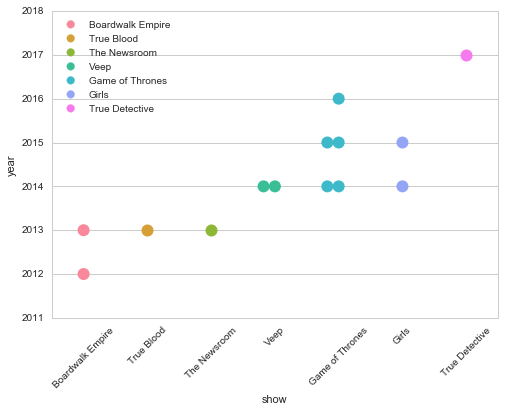

In [14]:
sns.set(style="whitegrid", palette="muted")
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Draw a categorical scatterplot to show each observation
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)

sns.swarmplot(x="show", y="year", hue="show", data=HBO, size=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)


plt.show()

In [15]:
HBO_Shows = pd.DataFrame({'show': ['Boardwalk Empire', 'The Newsroom', 'True Blood','Girls', 
                                   'Game of Thrones', 'Veep', 'True Detective'],
                         'Year of Pilot Episode' : [2010, 2012, 2008, 2012, 2011, 2012, 2014]})
HBO_Shows

,Year of Pilot Episode,show
0,2010,Boardwalk Empire
1,2012,The Newsroom
2,2008,True Blood
3,2012,Girls
4,2011,Game of Thrones
5,2012,Veep
6,2014,True Detective


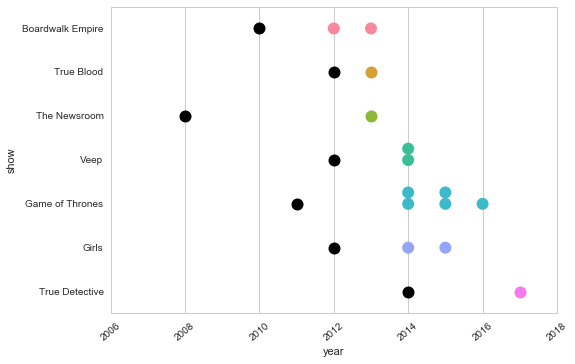

In [60]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)

sns.swarmplot(x="Year of Pilot Episode", y='show', color='black', data=HBO_Shows, 
              size=12)
sns.swarmplot(x="year", y="show", hue="show", data=HBO, size=12)
ax.legend_.remove()
plt.xticks(rotation=40)


plt.show()

In [17]:
HBO_joined = pd.merge(left=HBO, right=HBO_Shows, how='inner', on='show')
HBO_joined

,title,clue,date,year,answer,unique,day,answer_count,cw_date,show,Year of Pilot Episode
0,,"""Boardwalk Empire"" airer",September 5,2012,HBO,False,Wednesday,15,2012-09-01,Boardwalk Empire,2010
1,ARTFUL THINKING,"""Boardwalk Empire"" network",July 21,2013,HBO,False,Sunday,15,2013-07-01,Boardwalk Empire,2010
2,THAT GIRL,"""True Blood"" network",September 15,2013,HBO,False,Sunday,15,2013-09-01,True Blood,2008
3,WHO'S LEFT?,"""The Newsroom"" channel",October 27,2013,HBO,False,Sunday,15,2013-10-01,The Newsroom,2012
4,,"""Veep"" airer",March 29,2014,HBO,False,Saturday,15,2014-03-01,Veep,2012
5,,"""Veep"" channel",June 4,2014,HBO,False,Wednesday,15,2014-06-01,Veep,2012
6,,"""Game of Thrones"" network",March 5,2014,HBO,False,Wednesday,15,2014-03-01,Game of Thrones,2011
7,,"""Game of Thrones"" network",April 9,2014,HBO,False,Wednesday,15,2014-04-01,Game of Thrones,2011
8,,"""Game of Thrones"" airer",July 8,2015,HBO,False,Wednesday,15,2015-07-01,Game of Thrones,2011
9,,"""Game of Thrones"" airer",December 30,2015,HBO,False,Wednesday,15,2015-12-01,Game of Thrones,2011


In [43]:
LIN = cw[(cw['answer']=='LIN')].sort_values(['cw_date']).reset_index(drop=True)

LIN['celeb'] = ["Maya Lin", "Jeremy Lin", "Jeremy Lin", "Jeremy Lin", "Jeremy Lin", "Justin Lin", "Lin Biao", "Jeremy Lin",
               "Justin Lin", "Jeremy Lin", "Lin Biao", "Lin Manuel- \nMiranda", "Justin Lin"]
LIN

,title,clue,date,year,answer,unique,day,answer_count,cw_date,celeb
0,SOFT T'S,Architectural designer Maya,April 28,2013,LIN,False,Sunday,13,2013-04-01,Maya Lin
1,,Jeremy of the N.B.A.,November 27,2013,LIN,False,Wednesday,13,2013-11-01,Jeremy Lin
2,,Jeremy of the N.B.A.,December 12,2013,LIN,False,Thursday,13,2013-12-01,Jeremy Lin
3,,Asian-American basketball sensation Jeremy,February 25,2014,LIN,False,Tuesday,13,2014-02-01,Jeremy Lin
4,,Hoopster Jeremy,November 6,2014,LIN,False,Thursday,13,2014-11-01,Jeremy Lin
5,,"Director Justin of the ""Fast and the Furious"" ...",December 6,2014,LIN,False,Saturday,13,2014-12-01,Justin Lin
6,,"___ Biao, Mao Zedong confederate",March 27,2015,LIN,False,Friday,13,2015-03-01,Lin Biao
7,3.1415926 ...,Jeremy of the N.B.A.,March 8,2015,LIN,False,Sunday,13,2015-03-01,Jeremy Lin
8,,"Justin who directed four of the ""Fast and the ...",October 16,2015,LIN,False,Friday,13,2015-10-01,Justin Lin
9,,Jeremy on the court,November 12,2015,LIN,False,Thursday,13,2015-11-01,Jeremy Lin


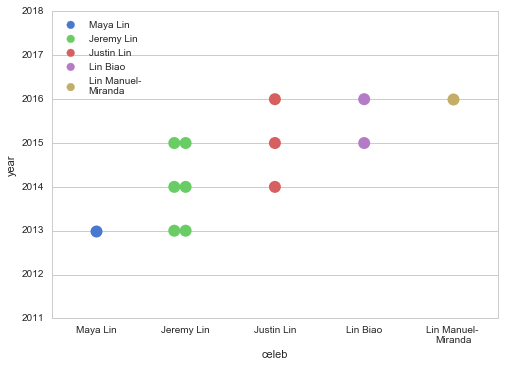

In [44]:
sns.set(style="whitegrid", palette="muted")

fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)

sns.swarmplot(x="celeb", y="year", hue="celeb", data=LIN, size=12)
plt.legend(loc='upper left')
plt.xticks(rotation=0)

plt.yticks(range(2011, 2019))


plt.show()

In [45]:
import plotly.graph_objs as go
layout = go.Layout(
    xaxis=dict(
        title='AXIS TITLE',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    yaxis=dict(
        title='AXIS TITLE',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    )
)

In [62]:
import plotly.plotly as py
import plotly.figure_factory as ff


df_gantt = [dict(Task=x[1][9], Start=x[1][8], Finish=x[1][8]+datetime.timedelta(days=20), 
                Resource='Clue') for x in LIN.iterrows()]

df_gantt = df_gantt + [dict(Task='Jeremy Lin', Start=datetime.date(2012, 2, 10), 
                            Finish=datetime.date(2012, 2, 28), Resource='LINSANITY'), 
                      dict(Task='Justin Lin', Start=datetime.date(2016, 7, 22), 
                            Finish=datetime.date(2016, 8, 8), Resource='Star Trek: Beyond'), 
                      dict(Task='Justin Lin', Start=datetime.date(2013, 5, 24), 
                            Finish=datetime.date(2013, 6, 10), Resource='Fast & Furious: 6'), 
                      dict(Task='Lin Manuel- \nMiranda', Start=datetime.date(2016, 6, 12), 
                            Finish=datetime.date(2016, 6, 30), Resource="2016 Tony Awards")]

fig = ff.create_gantt(df_gantt, group_tasks=True, title='Crossword Clues for "LIN"', 
                      show_colorbar=True, index_col='Resource', 
                      showgrid_x=True, showgrid_y=True)

py.iplot(fig, world_readable=True)